In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from LombScargle import periodogram, psd
from hypothesis_testing.bayes_factor import logB
from quasars import prep
from quasars import scratch_structure
from simulations.util import  *

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [2]:
n1 = np.load(scratch_structure.dir_data + 'ids.npy')
#redshifts = pd.read_csv(scratch_structure.dir_data + 'quasar_info.txt', delim_whitespace=True)
print(n1[70:80])

[102092 102227 102343 102353 102409  10243 102544 102617  10265 102650]


-0.0018310547


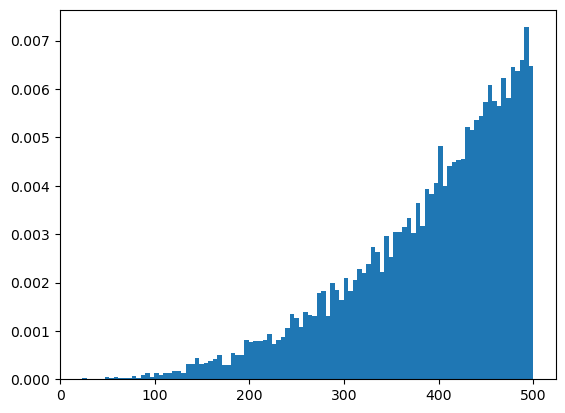

In [3]:
from quasars import prior

freq = jnp.linspace(1./500, 1./10., 10000)
Prior, null, logOdds = prior.prepare(freq[0], 0.)
print(logOdds)
# pdf
#y = jnp.log(freq)
#pdf = jnp.exp(-Prior.nlogp(y))

# histogram
key = jax.random.PRNGKey(42)
keys = jax.random.split(key, 10000)
samples= np.array(jax.vmap(Prior.rvs)(keys))
plt.hist(np.exp(-samples), bins = 100, density= True)
plt.show()

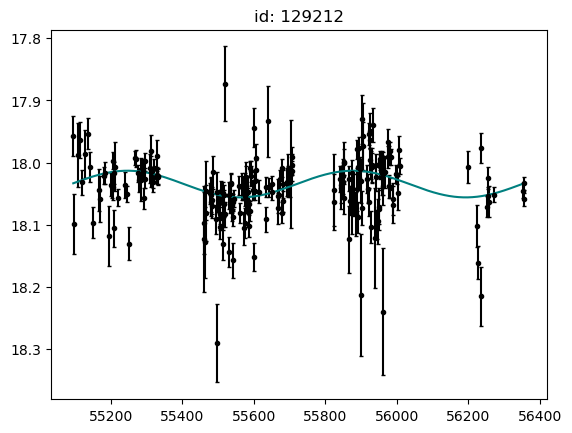

In [5]:
id = 129212
#id = 253736
time, mag, mag_err, freq, prior_params = prep.load_data(id)

score_white, amps = jax.vmap(periodogram.lomb_scargle(time, mag, True, mag_err))(freq)
ibest = jnp.argmax(score_white)
score_white, amp = score_white[ibest], amps[ibest]
freq_best = freq[ibest]
tshift = 0
plt.title('id: ' + str(id))
plt.errorbar(time-tshift, mag, mag_err, fmt = '.', capsize = 1.3, color= 'black')
t = jnp.linspace(jnp.min(time), jnp.max(time), 1000)
model= periodogram.fit(t, freq_best, amp)
plt.plot(t-tshift, model, color = 'teal')
plt.gca().invert_yaxis()

plt.show()